In [1]:
import numpy as np

In [6]:
with open('train.data', 'r') as f:
    lines_test = f.readlines()
print(lines_test[1])

0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1



In [9]:
lines_test[0]

'0,0.64,0.64,0,0.32,0,0,0,0,0,0,0.64,0,0,0,0.32,0,1.29,1.93,0,0.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.778,0,0,3.756,61,278,1\n'

In [21]:
def load_data(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
    samples = []
    labels = []
    for line in lines:
        line = line[:-1].split(',')
        samples.append(line[:-1])
        labels.append(line[-1])
    samples = np.array(samples, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    samples[:,-1] /= np.max(samples[:,-1])
    samples[:,-2] /= np.max(samples[:,-2])
    samples[:,-3] /= np.max(samples[:,-3])
    print('samples shape: ',samples.shape)
    print('labels shape: ',labels.shape)
    return samples, labels

In [23]:
x_train, y_train = load_data('train.data')
x_test, y_test = load_data('test.data')

samples shape:  (3224, 57)
labels shape:  (3224,)
samples shape:  (1377, 57)
labels shape:  (1377,)


In [20]:
print(x_train[0])
print(y_train[0])

[ 0.          0.63999999  0.63999999  0.          0.31999999  0.          0.
  0.          0.          0.          0.          0.63999999  0.          0.
  0.          0.31999999  0.          1.28999996  1.92999995  0.
  0.95999998  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.778       0.          0.
  0.00367695  0.00610672  0.0276287 ]
1.0


In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [54]:
epochs = 30

In [50]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(57,)))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                928       
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 68        
_________________________________________________________________
dropout_10 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint('best_weights.hdf5',verbose=1)

In [53]:
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, verbose=1, callbacks=[checkpointer],
                   validation_data=(x_test,y_test), shuffle=True)

Train on 3224 samples, validate on 1377 samples
Epoch 1/30
3224/3224 [==============================] - 1s 165us/step - loss: 0.6343 - acc: 0.6061 - val_loss: 0.5630 - val_acc: 0.6057

Epoch 00001: saving model to best_weights.hdf5
Epoch 2/30
3224/3224 [==============================] - 0s 36us/step - loss: 0.5298 - acc: 0.6452 - val_loss: 0.4390 - val_acc: 0.8322

Epoch 00002: saving model to best_weights.hdf5
Epoch 3/30
3224/3224 [==============================] - 0s 31us/step - loss: 0.4543 - acc: 0.8303 - val_loss: 0.3822 - val_acc: 0.9136

Epoch 00003: saving model to best_weights.hdf5
Epoch 4/30
3224/3224 [==============================] - 0s 31us/step - loss: 0.4125 - acc: 0.8734 - val_loss: 0.3488 - val_acc: 0.9281

Epoch 00004: saving model to best_weights.hdf5
Epoch 5/30
3224/3224 [==============================] - 0s 32us/step - loss: 0.3803 - acc: 0.8958 - val_loss: 0.3273 - val_acc: 0.9339

Epoch 00005: saving model to best_weights.hdf5
Epoch 6/30
3224/3224 [==============

In [56]:
history.history

{'acc': [0.60607940431859886,
  0.64516129047048298,
  0.83033498774095449,
  0.87344913136574531,
  0.8957816377171216,
  0.90198511181043339,
  0.90663771697368578,
  0.91532258064516125,
  0.91098014873547239,
  0.92152605444266833,
  0.91408188600398177,
  0.92214640213301402,
  0.92493796526054595,
  0.92524813880991408,
  0.92555831250718446,
  0.92617866019753015,
  0.92400744431663684,
  0.92959057057170058,
  0.92897022332506207,
  0.93114143905805302,
  0.9342431763265624,
  0.92959057086750529,
  0.93455335002383289,
  0.93393300233348719,
  0.93548387081983964,
  0.93362282863621682,
  0.93393300262929191,
  0.93021091826204627,
  0.93269230784021007,
  0.9398263027295285],
 'loss': [0.63429939569373872,
  0.52977305243979611,
  0.45429946552435163,
  0.41253287391390459,
  0.38032054856752345,
  0.36302181878693346,
  0.34233496539645986,
  0.32960688509509228,
  0.31678819138713865,
  0.2981116781681406,
  0.30110920643983941,
  0.28963545974223842,
  0.28032454585762828,

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
xrange = range(epochs)

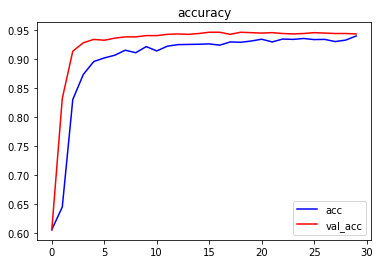

In [62]:
plt.plot(xrange, history.history['acc'], 'blue', label='acc')
plt.plot(xrange, history.history['val_acc'], 'red', label='val_acc')
plt.title('accuracy')
plt.legend()
plt.show()

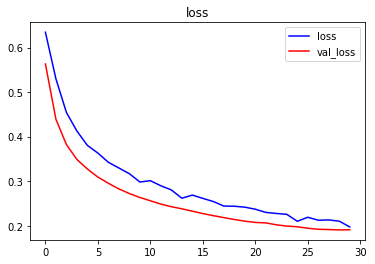

In [63]:
plt.plot(xrange, history.history['loss'], 'blue', label='loss')
plt.plot(xrange, history.history['val_loss'], 'red', label='val_loss')
plt.title('loss')
plt.legend()
plt.show()

In [64]:
def load_data_for_flag(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
    samples = []
    for line in lines:
        line = line[:-1].split(',')
        samples.append(line)
    samples = np.array(samples, dtype=np.float32)
    samples[:,-1] /= np.max(samples[:,-1])
    samples[:,-2] /= np.max(samples[:,-2])
    samples[:,-3] /= np.max(samples[:,-3])
    print('flag_data shape: ',samples.shape)
    return samples

In [65]:
x_flag = load_data_for_flag('get_the_flag.data')

flag_data shape:  (560, 57)


In [66]:
x_flag[0]

array([ 0.20999999,  0.28      ,  0.5       ,  0.        ,  0.14      ,
        0.28      ,  0.20999999,  0.07      ,  0.        ,  0.94      ,
        0.20999999,  0.79000002,  0.64999998,  0.20999999,  0.14      ,
        0.14      ,  0.07      ,  0.28      ,  3.47000003,  0.        ,
        1.59000003,  0.        ,  0.43000001,  0.43000001,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.07      ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.132     ,
        0.        ,  0.37200001,  0.18000001,  0.048     ,  0.00463855,
        0.04582577,  0.17417824], dtype=float32)

In [67]:
model.load_weights('best_weights.hdf5')
y_pred = model.predict(x_flag,verbose=1)

560/560 [==============================] - 0s 128us/step


In [68]:
y_pred[:5]

array([[ 0.85829353],
       [ 0.85829353],
       [ 0.85829353],
       [ 0.85829353],
       [ 0.85829353]], dtype=float32)

In [70]:
y_pred.shape

(560, 1)

In [77]:
y_pred[555:565]

array([[ 0.85829353],
       [ 0.85829353],
       [ 0.61293209],
       [ 0.85829353],
       [ 0.82976049]], dtype=float32)

In [83]:
ans = ''
for i in np.arange(0,y_pred.shape[0],10):
    pred = np.mean(y_pred[i:i+10])
    if(pred>0.5):
        ans += '1'
    else:
        ans += '0'
    cnt = 0
    for value in y_pred[i:i+10]:
        if(value>0.5):
            cnt += 1
    cnt /= len(y_pred[i:i+10])
    if(cnt>=0.3 and cnt<=0.7):
        print(i,' error cnt_value: ',cnt)
print(ans)

310  error cnt_value:  0.3
10001001110101110100111011011100100101111110000011001001


### Answer:10001001110101110100111011011100100101111110000011001001